In [1]:
import sleep_study as ss
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import pandas as pd

In [2]:
ss.init()

age information stored in /home/harlinl/sleep_study_harlin/age_file.csv


## Mapping between the de-identified EDF file and the original sleep datafile accessible via Natus Sleepworks.

In [3]:
raw = ss.data.load_study('18685_16246', exclude=['Patient Event'])
sfreq = raw.info['sfreq']
print(raw.ch_names)
channels = ['EOG LOC-M2', 'EOG ROC-M1', 'EEG F3-M2','EEG F4-M1',
             'EEG C3-M2', 'EEG C4-M1', 'EEG O1-M2', 'EEG O2-M1', 
            'EEG CZ-O1', 'EMG CHIN1-CHIN2','RATE','SNORE', 
            'SNORE_DR', 'ECG LA-RA', 'OSAT','ETCO2', 
            'TCCO2', 'CAPNO','FLOW_DR','RESP FLOW', 'XFLOW', 
             'RESP CHEST', 'RESP ABDOMEN',
            'EMG LLEG+-LLEG-', 'EMG RLEG+-RLEG-', 
              'RESP RATE', 'C-FLOW', 'C-PRESSURE']

['EOG LOC-M2', 'EOG ROC-M1', 'EMG CHIN1-CHIN2', 'EEG F3-M2', 'EEG F4-M1', 'EEG C3-M2', 'EEG C4-M1', 'EEG O1-M2', 'EEG O2-M1', 'EEG CZ-O1', 'EMG LLEG+-LLEG-', 'EMG RLEG+-RLEG-', 'ECG LA-RA', 'SNORE', 'SNORE_DR', 'FLOW_DR', 'RESP FLOW', 'XFLOW', 'RESP CHEST', 'RESP ABDOMEN', 'OSAT', 'RATE', 'ETCO2', 'CAPNO', 'RESP RATE', 'TCCO2', 'C-FLOW', 'C-PRESSURE']


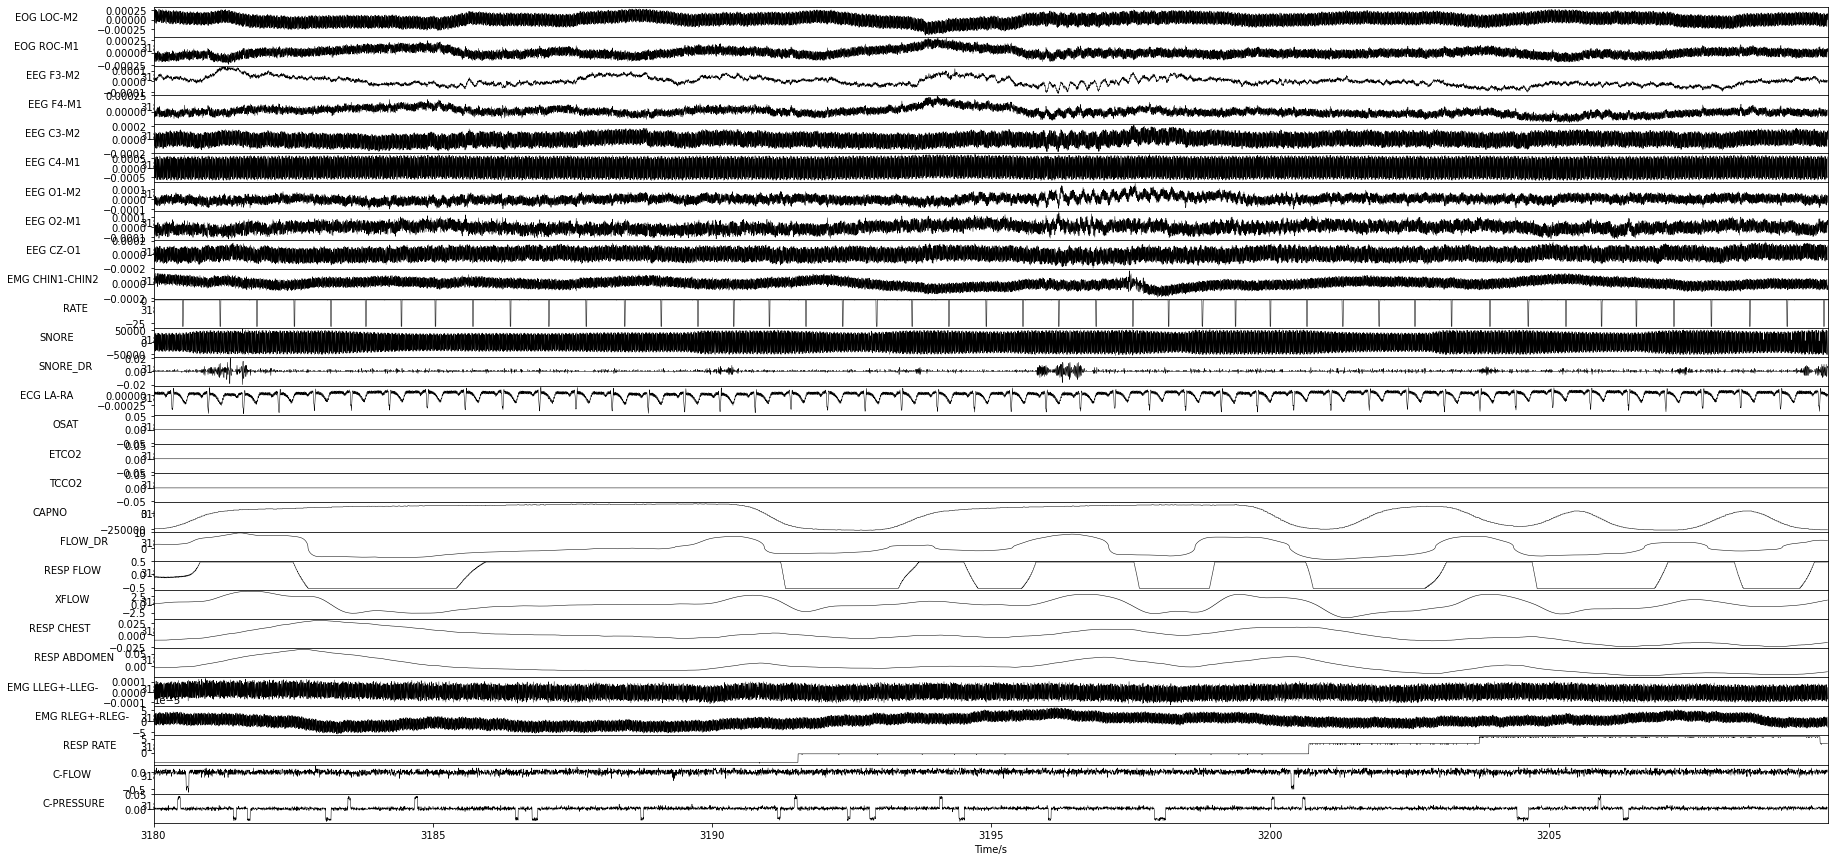

In [4]:
start = np.floor(raw.annotations[23]['onset']+813.0 - 3)
indices = raw.time_as_index([start, start+30])
x = np.arange(start, start+30, 1/sfreq)

data = raw.get_data(channels, start=indices[0], stop=indices[1])

fig, axs = plt.subplots(len(data), 1, figsize=(30,15))
for i in range(len(data)):
    y = data[i] - data[i].mean()
    axs[i].plot(x, y, 'black', linewidth=0.5)
    axs[i].set_ylabel(channels[i], labelpad=50, rotation=0)
    plt.subplots_adjust(wspace=0, hspace=0)
    axs[i].margins(x=0)
    
plt.xlabel('Time/s')    
plt.savefig('18685_16246_vis.png')

## mapping between de-identified clinical data and the EHR

In [5]:
ID = 18685
print(ss.info.HEALTH_DATA_FNS)

for name in ss.info.HEALTH_DATA_FNS:
    df = ss.info.load_health_info(name)
    print(name, df.columns)
    rows = df.loc[df['STUDY_PAT_ID'] == ID]
    print(len(rows))
    rows.to_csv(str(ID) + '_' + name, index=False)

['DEMOGRAPHIC.csv', 'DIAGNOSIS.csv', 'ENCOUNTER.csv', 'MEASUREMENT.csv', 'MEDICATION.csv', 'PROCEDURE_SURG_HX.csv', 'PROCEDURE.csv', 'SLEEP_ENC_ID.csv', 'SLEEP_STUDY.csv']
DEMOGRAPHIC.csv Index(['STUDY_PAT_ID', 'BIRTH_DATE', 'PCORI_GENDER_CD', 'PCORI_RACE_CD',
       'PCORI_HISPANIC_CD', 'GENDER_DESCR', 'RACE_DESCR', 'ETHNICITY_DESCR',
       'LANGUAGE_DESCR', 'PEDS_GEST_AGE_NUM_WEEKS', 'PEDS_GEST_AGE_NUM_DAYS'],
      dtype='object')
1


/home/harlinl/anaconda3/envs/py3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3338: DtypeWarning: Columns (11) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


DIAGNOSIS.csv Index(['STUDY_DX_ID', 'STUDY_ENC_ID', 'STUDY_PAT_ID', 'DX_START_DATETIME',
       'DX_END_DATETIME', 'DX_SOURCE_TYPE', 'DX_ENC_TYPE', 'DX_CODE_TYPE',
       'DX_CODE', 'DX_NAME', 'DX_ALT_CODE', 'CLASS_OF_PROBLEM', 'CHRONIC_YN',
       'PROV_ID'],
      dtype='object')
103


/home/harlinl/anaconda3/envs/py3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3338: DtypeWarning: Columns (12,19,20) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


ENCOUNTER.csv Index(['STUDY_ENC_ID', 'STUDY_PAT_ID', 'ENCOUNTER_DATE',
       'VISIT_START_DATETIME', 'VISIT_END_DATETIME', 'ADT_ARRIVAL_DATETIME',
       'ED_DEPARTURE_DATETIME', 'ENCOUNTER_TYPE', 'VISIT_TYPE_CD',
       'VISIT_TYPE_DESCR', 'ICU_VISIT_YN', 'PROV_ID', 'PROV_TYPE', 'DEPT_ID',
       'DEPT_SPECIALTY', 'ADMIT_SOURCE', 'HOSP_ADMIT_SOURCE',
       'DISCHARGE_DISPOSITION', 'DISCHARGE_DESTINATION', 'DRG_CODE',
       'DRG_NAME', 'VISIT_REASON'],
      dtype='object')
49
MEASUREMENT.csv Index(['STUDY_MEAS_ID', 'STUDY_PAT_ID', 'STUDY_ENC_ID',
       'MEAS_RECORDED_DATETIME', 'MEAS_TYPE', 'MEAS_VALUE_NUMBER',
       'MEAS_VALUE_TEXT', 'MEAS_SOURCE', 'STUDY_PROV_ID'],
      dtype='object')
31


/home/harlinl/anaconda3/envs/py3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3338: DtypeWarning: Columns (11) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


MEDICATION.csv Index(['STUDY_MED_ID', 'STUDY_ENC_ID', 'STUDY_PAT_ID', 'MED_START_DATETIME',
       'MED_END_DATETIME', 'MED_ORDER_DATETIME', 'MED_TAKEN_DATETIME',
       'MED_SOURCE_TYPE', 'QUANTITY', 'DAYS_SUPPLY', 'FREQUENCY',
       'EFFECTIVE_DRUG_DOSE', 'EFF_DRUG_DOSE_SOURCE_VALUE', 'DRUG_DOSE_UNIT',
       'REFILLS', 'RXNORM_CODE', 'RXNORM_TERM_TYPE', 'MEDICATION_DESCR',
       'GENERIC_DRUG_DESCR', 'DRUG_ORDER_STATUS', 'DRUG_ACTION', 'ROUTE',
       'ROUTE_SOURCE_VALUE', 'PRESCRIBING_PROV_ID', 'PHARM_CLASS',
       'PHARM_SUBCLASS', 'THERA_CLASS', 'THERA_SUBCLASS'],
      dtype='object')
18
PROCEDURE_SURG_HX.csv Index(['STUDY_SURGHX_ID', 'STUDY_PAT_ID', 'PROC_NOTED_DATE', 'PROC_START_TIME',
       'PROC_END_TIME', 'PROC_CODE', 'CPT_CODE', 'PROC_DESCR'],
      dtype='object')
1
PROCEDURE.csv Index(['STUDY_PROC_ID', 'STUDY_PAT_ID', 'STUDY_ENC_ID', 'PROCEDURE_DATETIME',
       'STUDY_PROV_ID', 'PROC_ID_NCH', 'PROC_CODE', 'PROC_CODE_TYPE',
       'PROC_DESCR'],
      dtype='object')

## mapping between random identifier linking the sleep studies to the patient data

Strategy: Look for encounter IDs in two files, ENCOUNTER.csv and PROCEDURES.csv
the ENCOUNTER tables has start time for the encounter, and while this does not match exactly to the start time
I have from Natus, it appears to match within a two hour window. Sleep studies appear to always be labeled with
the 'DEPT_SPECIALTY' == 'Sleep Medicine'

The bulk of the matches come from using a window around the start time in the ENCOUNTER table

If this doesn't work, it usually indicates that the time has been entered wrong, but the date is still right.
Therefore the second pass uses just the date.

In a couple of cases, I got more than one hit from the date in the ENCOUNTER table. I manually inspected all
of these and the first hit was the best one (providing the most information, and the most likely match).
Therefore, for code brevity, I just took the first hit in the list, but in the vast majority of cases,
there was only one match.

If there were no date matches in the encounter, then this script looks in the PROCEDURE table for a date match
and a match of one of these procedure codes.

93005 ECG, ROUTINE, MIN 12 LEADS, TRACING ONLY
95782 POLYSOMNOGRAPHY, <6YRS, 4 OR MORE ADDL PARAM, W/ TECH
95810 PR POLYSOM 6/>YRS SLEEP 4/> ADDL PARAM ATTND
4A1ZXQZ Monitoring of Sleep, External Approach

3960 maps were made from the ENCOUNTER table
4 maps were made from the PROCEDURE table
20 studies were unmatched

Run on 04/09/20 by S.D.


In [6]:
sleep_proc_codes = ['93005', '95782', '95810', '4A1ZXQZ']
pd.set_option('display.max_columns', None)
enc_df = ss.info.load_health_info('ENCOUNTER.csv')
sleep_df = ss.info.load_health_info('SLEEP_STUDY.csv')
proc_df = ss.info.load_health_info('PROCEDURE.csv')
slp_dict = {'STUDY_PAT_ID': [], 'SLEEP_STUDY_ID': [], 'STUDY_ENC_ID': []}
no_enc_id = []
enc_count = 0
proc_count = 0
for i, row in sleep_df.iterrows():
    pat_id = int(row['STUDY_PAT_ID'])
    study_id = int(row['SLEEP_STUDY_ID'])
    upper_time = pd.to_datetime(row['SLEEP_STUDY_START_DATETIME']) + pd.Timedelta('{} hours'.format(1))
    lower_time = pd.to_datetime(row['SLEEP_STUDY_START_DATETIME']) - pd.Timedelta('{} hours'.format(1))
    study_date = pd.to_datetime(row['SLEEP_STUDY_START_DATETIME'].date())
    enc_ndf = enc_df[(enc_df['VISIT_START_DATETIME'] < upper_time)
                     & (enc_df['VISIT_START_DATETIME'] > lower_time)
                     & (enc_df['STUDY_PAT_ID'] == pat_id)
                     & (enc_df['DEPT_SPECIALTY'] == 'Sleep Medicine')]
    if len(enc_ndf) >= 1:
        # Note that I have visually inspected the cases where there was more than one hit, and it was appropriate to
        # select the first case. This only happened in 3 cases, all others only had one hit.
        slp_dict['STUDY_PAT_ID'].append(pat_id)
        slp_dict['SLEEP_STUDY_ID'].append(study_id)
        slp_dict['STUDY_ENC_ID'].append(enc_ndf.iloc[0]['STUDY_ENC_ID'])
        enc_count += 1
    else:
        enc_ndf = enc_df[(enc_df['ENCOUNTER_DATE'] == study_date)
                         & (enc_df['STUDY_PAT_ID'] == pat_id)
                         & (enc_df['DEPT_SPECIALTY'] == 'Sleep Medicine')]
        if len(enc_ndf) >= 1:
            slp_dict['STUDY_PAT_ID'].append(pat_id)
            slp_dict['SLEEP_STUDY_ID'].append(study_id)
            slp_dict['STUDY_ENC_ID'].append(enc_ndf.iloc[0]['STUDY_ENC_ID'])
            enc_count += 1
        else:
            proc_ndf = proc_df[(proc_df['PROCEDURE_DATETIME'] == study_date)
                               & (proc_df['STUDY_PAT_ID'] == pat_id) & (
                                   proc_df['PROC_CODE'].isin(sleep_proc_codes))]
            if len(proc_ndf) >= 1:
                slp_dict['STUDY_PAT_ID'].append(pat_id)
                slp_dict['SLEEP_STUDY_ID'].append(study_id)
                slp_dict['STUDY_ENC_ID'].append(proc_ndf.iloc[0]['STUDY_ENC_ID'])
                proc_count += 1
            else:
                no_enc_id.append(study_id)
fp_out = 'SLEEP_ENC_ID.csv'
df_out = pd.DataFrame(slp_dict)
print(len(sleep_df))
print(len(df_out))
print(no_enc_id)
print("{} maps were made from the ENCOUNTER table".format(enc_count))
print("{} maps were made from the PROCEDURE table".format(proc_count))
df_out.to_csv(fp_out, index=False)

/home/harlinl/anaconda3/envs/py3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3338: DtypeWarning: Columns (12,19,20) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


3984
3964
[16444, 18478, 12802, 12505, 17749, 3127, 16354, 1153, 18637, 23122, 11839, 6358, 11788, 11215, 11134, 15703, 8695, 18517, 14419, 4618]
3960 maps were made from the ENCOUNTER table
4 maps were made from the PROCEDURE table
